
NETID: SOLUTION 


# Introduction to Classifiers

Two lectures ago we covered linear regression and predicting the value of a continuous variable. We use __classifiers__ to predict binary or categorical variables. Classifiers can help us answer yes/no questions or categorize an observation into one of several categories. 

## kNN Classifier

There are various classification algorithms, each of which is better suited to some situations than others. In this lecture we are learning about __kNN__, which is one of these classifiers

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('lecture6data.csv')
df=df.drop('Unnamed: 32',axis=1)
df=df.drop('id',axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## <span style="color:purple">_Problem 1_</span>

Build a kNN model predicting whether an observation is benign or malignant. You should split the dataset into a training set and a test set as covered previously in the course, fit the model on the observations in the training set, and predict the target variable for the test set.

There are a couple of things to note for this problem. First, you are free to choose whichever features you want to predict the target feature, but you should not use id or the target variable itself. Second, you can optionally choose the k parameter for the kNN model (the default value is 5).

Save your predictions in a variable named "predictions".

**Please do not change the variable names already provided as they are used later in the demo**

In [17]:
# TODO separate your X (features) and your Y (target). X should have everything in df except the target.
X=df.drop('diagnosis',axis=1) 
y=df['diagnosis'] 

# TODO train test split your data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# This is the function we use to create the kNN model (default k=5)
model = KNeighborsClassifier()

# TODO fit the model using the train data
model.fit(x_train, y_train) 

# TODO store the predictions for the test sets
predictions = model.predict(x_test) 


In [18]:
# TODO find the accuracy score of your predictions
from sklearn.metrics import accuracy_score
print("sklearn's accuracy score for diagnosis:", accuracy_score(y_test, predictions)) 


sklearn's accuracy score for diagnosis: 0.956140350877193


### <span style="color:purple"> _end of Problem 1_</span>

## Measuring Accuracy

Measuring the accuracy of classifiers is more intuitive than calculating the accuracy of a linear regression model. When we predict categorical values, our accuracy score is simply the proportion of values that we computed correctly. For example, if we have a test set of size 100 and we predict 93 of the observations correctly, we have an accuracy score of 93 percent.

In [19]:
# Compute the accuracy score of the model created above
accuracy = accuracy_score(y_test, predictions)
print('accuracy:',accuracy)

# Compute the accuracy of predicting all diagnoses are benign
y_train.describe()
y_test.describe()
base_array = np.full(114, 'B')

baseline = accuracy_score(y_test, base_array)
print('baseline:',baseline)

# Compute the percent improvement from the baseline
improvement = (accuracy - baseline) / baseline
print('improvment',improvement)

accuracy: 0.956140350877193
baseline: 0.6228070175438597
improvment 0.5352112676056336


The above improvement shows just how beneficial the kNN model can be. It also shows us that we have chosen an appropriate value for k because there is an improvement over the baseline assumption (average category of values).

## Fit/Overfitting

Below are accuracy scores of the same kNN model, but with the value of k changing. Note how the accuracy changes as k increases. As mentioned during the lecture, a high value of k can improve the accuracy of the model, but too high a value of k will essentially be the average of all of the data.

In [20]:
# Model when k=1
model1 = KNeighborsClassifier(1)
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_test)

# Model when k=10
model10 = KNeighborsClassifier(10)
model10.fit(x_train, y_train)
predictions10 = model10.predict(x_test)

# Model when k=100
model100 = KNeighborsClassifier(100)
model100.fit(x_train, y_train)
predictions100 = model100.predict(x_test)

print("accuracy score when k=1:", accuracy_score(y_test, predictions1))
print("accuracy score when k=10:", accuracy_score(y_test, predictions10))
print("accuracy score when k=100:", accuracy_score(y_test, predictions100))


accuracy score when k=1: 0.9298245614035088
accuracy score when k=10: 0.9649122807017544
accuracy score when k=100: 0.9473684210526315


## <span style="color:purple">_Problem 2_</span>

Now we are going to plot the relationship between the value of k and the accuracy score of the model for this data set.

Using a loop, create models with nieghbors ranging from 1-30. Find the accuracy for each of these models and graph them with number of nieghbors on the x-axis and accuracy on the y-axis. **You do not need to redo the train test split.**

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [23]:
# TODO find the accuracy of the model with each value of k from 1-30 inclusive
accuracy=[]
for k in range(1,31):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy.append(accuracy_score(predictions,y_test))

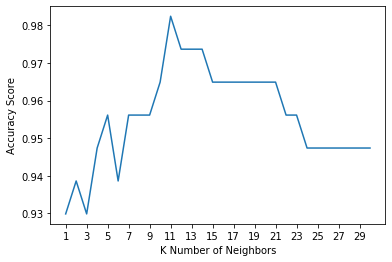

In [25]:
# TODO create the plot of the accuracy array determined in the previous cell
plt.plot(range(1,31),accuracy)
plt.xticks(range(1,31,2),range(1,31,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.show()

### <span style="color:purple">_end of Problem 2_</span>

## Confusion Matrix

**Reminder**: The confusion matrix is depicted below

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-ik58{background-color:#ffcb2f;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <td class="tg-ik58"></td>
    <td class="tg-ik58">Positive'<br>(Predicted)</td>
    <td class="tg-ik58">Negative'<br>(Predicted)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Positive<br>(Actual)</td>
    <td class="tg-0pky">True Positive</td>
    <td class="tg-0pky">False Negative</td>
  </tr>
  <tr>
    <td class="tg-0pky">Negative<br>(Actual)</td>
    <td class="tg-0pky">False Positive</td>
    <td class="tg-0pky">True Negative</td>
  </tr>
</table>

Here are the equations specified in the lecture for your convenience with the next problem.

**Sensitivity** = True Positive /(True Positive + False Negative)

**Specificity** = True Negative /(True Negative + False Positive)

**Accuracy** = (True Positive + True Negative) / Total

**Error** = (False Positive + False Negative) / Total

**Precision** = True Positive / (True Positive + False Positive) 

## <span style="color:purple">_Problem 3_</span>

Given the Table Below, Calculate the **Specificity**, **Sensitivity**, **Overall Error Rate**, **Overall Accuracy**, **Precision** of the data. 
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-ik58{background-color:#ffcb2f;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <td class="tg-ik58"></td>
    <td class="tg-ik58">Positive'<br>(Predicted)</td>
    <td class="tg-ik58">Negative'<br>(Predicted)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Positive<br>(Actual)</td>
    <td class="tg-0pky">146</td>
    <td class="tg-0pky">32</td>
  </tr>
  <tr>
    <td class="tg-0pky">Negative<br>(Actual)</td>
    <td class="tg-0pky">21</td>
    <td class="tg-0pky">590</td>
  </tr>
</table>

In [27]:
print("sensitivity:", 146/(146+32))
print("specificity:", 590/(590+21))
print("accuracy:", (146+590)/(146+32+21+590))
print("error:", (21+32)/(146+32+21+590))
print("precision:", 146/(146+21))

sensitivity: 0.8202247191011236
specificity: 0.9656301145662848
accuracy: 0.9328263624841572
error: 0.06717363751584284
precision: 0.874251497005988


### <span style="color:purple">_end of Problem 3_</span>

## <span style="color:purple">_Problem 4_ (extra credit)</span>

### <span style="color:purple">Part a</span>
Before running kNN, which of the following kinds of preprocessing should we do? Choose all that apply.

1) Scale

2) Center

3) Remove correlated features

4) Remove outliers



1) Scale - Yes. We want each feature to be treated equally when calculating distance. Here's an example: Imagine we have a feature called Feature1 that is between 1 and 10, and another feature called Feature2 that is between 1 and 10,000. Consider the following three samples: 

- A: Feature1=1, Feature2=10,000
- B: Feature1=10, Feature2=10,000
- C: Feature1=1, Feature2=9,000

Intuitively, A is pretty similar to C, since they have the same Feature1 and B's Feature2 is only 10% smaller than A's Feature2. Intuitively, A is very different from B, because although they have the same Feature2, they have very different Feature1's. But if we plug these into the distance formula, A is much closer to B than it is to C.



2) Center - No. Centering does not affect kNN, as the distance between points will be the same. (Rare exception: if a feature has only enormous values, e.g. numbers greater than 1,000,000,000, then centering may help kNN run a little faster.) 

3) Remove correlated features - No.

4) Remove outliers - No. 


### <span style="color:purple">Part b</span>
Let's say you want to run kNN on a dataset with both continuous features and binary features. Can you think of any potential issues that might arise from mixing these data types? Also, how might you preprocess categorical data to use in a kNN? Ordinal data?


Let's assume we scale so that data is between 0 and 1. With binary features, the data is either 0 or 1. With continuous features, their values could be any decimal between 0 or 1 -- it's more of a spectrum. So, binary features can begin to feel somewhat extreme. This is best explained in an example: say we're dealing with cars that go between 0 and 100mph. But, we only have the binary feature "car goes >50mph" . Consider a car that goes 49mph vs a car that goes 51mph. Now consider a car that goes 10mph vs a car that goes 100mph. In kNN, the distance between 49mph and 51mph is the same as the distance between 10mph and 100mph!

With that said, it's usually okay to use binary and continuous features together in kNN.

One popular option for categorical data is to use one-hot encoding.

We usually just use ordinal data as is. However, we sometimes run into the same issue as binary data where distance differences can feel a bit extreme.

### <span style="color:purple">_end of Problem 4_</span>

## <span style="color:purple">_Problem 5_ (extra credit)</span>

We've talked about sensitivity and specificity. Recall these high level intuitions:
- high sensitivity -> able to correctly identify positives
- high specificty -> able to correctly identify negatives

### <span style="color:purple">Part a</span>
Identify a model that has have 100% sensitivity, no matter what dataset it is run on. Similarly, identify a model with 100% specificity.

**Hint**: Recall that a "model" is just a function, meaning that it takes in an input and *spits out an output*. Your job is to figure out, if you get an input x, should the output for that x be 0 or should it be 1?



100% sensitivity: a model that always outputs 1 (or "true")

100% specificity: a model that always outputs 0 (or "false")

### <span style="color:purple">Part b</span>
In Problem 2, you plotted kNN accuracy vs `k`. Now, make a plot kNN sensitivity vs. `k` and another plot for kNN specificity. Use the same dataset as in Problem 2, and go from k=1 to k=30.

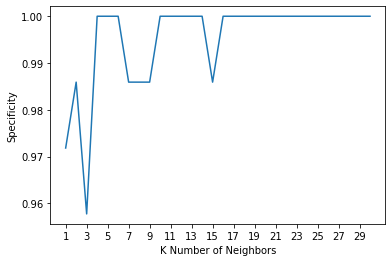

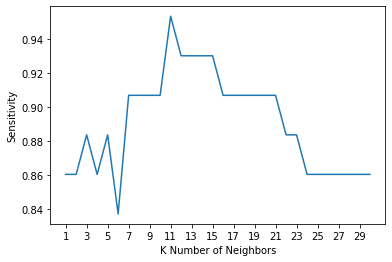

In [46]:
from sklearn.metrics import confusion_matrix

specificity=[]
sensitivity=[]
for k in range(1,31):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    specificity.append(tn / (tn + fp))
    sensitivity.append(tp / (tp + fn))
    
plt.plot(range(1,31),specificity)
plt.xticks(range(1,31,2),range(1,31,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Specificity")
plt.show()

plt.plot(range(1,31),sensitivity)
plt.xticks(range(1,31,2),range(1,31,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Sensitivity")
plt.show()

### <span style="color:purple">Part c</span>
Now, plot the average of specificity and sensitivity against the number of neighbors.

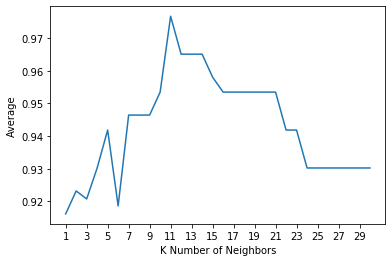

In [61]:
plt.plot(range(1,31),[(specificity[i] + sensitivity[i])/2 for i in range(30)])
plt.xticks(range(1,31,2),range(1,31,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Average")
plt.show()

### <span style="color:purple">Part d (just for fun)</span>
Prove the following statement:

*If the testing set has the same number of positive and negative examples, then the accuracy is equal to the average of the specificity and sensitivity.*

### <span style="color:purple">Part e (even more fun)</span>
Let `p` be the number of false positives and `n` be the number of false negatives. Prove that the difference between specificity and sensitivity is the difference between `p` and `n`, divided by the total number of incorrect predictions.

### <span style="color:purple">Part f (even more fun???)</span>
In part D, we saw a special case where accuracy is the average between specificity and sensitivity. Let's look at the general case -- how different is accuracy from the average between specificity and sensitivity? Investigate this question by proving the following statement:

Let `p` = # of false positives, and `N` = # of true negatives. Suppose that in the training set, there are `x` times as many positive examples as their are negative examples. Also suppose that the number of true positives is equal to the number of false positives. Then, `acc` = `R` * `avg`, where `acc` = accuracy, `avg` = the average of specificy and sensitivity, and `R` = $\frac{(p+N)x}{Nx^2+\left(p+N\right)x+p}$.

### <span style="color:purple">_end of Problem 5_</span>

## <span style="color:purple">_Problem 6_ (0 points)</span>

In INFO1998, we focus on the high level concepts and applications, and as a result, we rarely delve into the computations that go into our machine learning algorithms. This isn't to say that those computations are unimportant. When working with **enormous** datasets, some algorithms become **infeasible** since they need to do so much *computation* that training a model could take several days. When working with **complex** datasets with **special properties**, we can sometimes **adapt** algorithms based on our understanding of the algorithm's *computations*.

This question challenges you to think about the computations involved in kNN.

Also, this is worth 0 points, so feel free to look up the answer if you want.

### <span style="color:purple">Part a</span>
When a kNN model is making a prediction for a sample, what does it need to do? Be specific.

Find the distance between the sample and every training sample, and compare them to find the k smallest distances. 

### <span style="color:purple">Part b</span>
In a past class, saw that the linear regression model is just a linear function; that is, the whole model can be represented by just a couple numbers (the weights/coefficients). Based on Part a, what data is necessary to represent a trained kNN model?

All the data in the entire training set is needed to represent a trained kNN model. 

### <span style="color:purple">Part c</span>
Based on Part b, describe the training algorithm for a kNN model. Recall that a training algorithm is how you go from a training set to a representation of a model. Hint: it's super simple.

Just copy the whole training set. 

In parts D and E, write your answers in terms of the quantities: 
- number of training samples, T
- number of samples in dataset, N
- number of features in dataset, F
- number of neighbors, k

### <span style="color:purple">Part d</span>
Write down an expression estimating the memory needed to represent a trained kNN model.

O(T x F). This is [big-O notation](https://www.khanacademy.org/computing/computer-science/algorithms/asymptotic-notation/a/big-o-notation). 

### <span style="color:purple">Part e</span>
Write down an expression estimating the time needed for kNN to make a prediction for a single point.

O(T x F) 

### <span style="color:purple">Part f</span>
Estimate the memory space needed to represent a kNN with the specifications below. Also estimate how long it would take to predict 1,000 test samples.

- number of training samples: 1,000,000
- number of samples in dataset: 100,000,000
- number of features in dataset: 50
- number of neighbors: 5
- size of one feature of one sample: 8 bytes
- time to calculate distance for x features: x/10,000 seconds


Memory: (8 bytes) x (saved pieces of data) = (8 bytes) x (1,000,000 training samples) x (50 features) = 400 megabytes

Prediction time: (1,000,000 saved samples) x (50/10,000 seconds of distance calculation per sample) x 1,000 = ~2 months

### <span style="color:purple">Part g</span>
There are many variations on kNN that aim to speed up kNN predictions. This might involve saving less of the train set, checking only a subset of the saved data, encoding data differently, or organizing data differently. Look up two of these variations, and compare their advantages/disadvantages. 